<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_005_eda_skewness_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### 1. **Initial Data Exploration**:
   - Begin by reviewing the key metrics (precision, recall, F1-score) for both classes (0 and 1) across different experiments and transformations.
   - Understand how skewness has been impacted by the transformations, as this often correlates with model performance.

### 2. **Comparing Classification Report Metrics**:
   - Plot the key metrics (Precision, Recall, F1-score) for each class across different experiments (baseline vs. outliers removed) and transformations.
   - A bar plot or grouped bar plot is useful here for visual comparisons.

### 3. **Comparing Skewness Values**:
   - Skewness is a key indicator of how well the data distribution was adjusted by transformations. Plot the skewness values before and after outlier removal for each pay column.

### 4. **Visualizing and Interpreting Combined Results**:
   - You can use grouped bar plots or line plots to compare classification metrics and skewness side by side for deeper insights.

Let’s break it down with code examples.

### 4. **Interpreting the Results**

- **Classification Metrics**: Analyze how precision, recall, and F1-score for each class change after outlier removal and different transformations. Look for improvements, especially for class 1 (which typically represents the positive class in imbalanced datasets).
  
- **Skewness**: Evaluate whether the transformations effectively reduce skewness and if that reduction translates to better model performance.

- **Combined Analysis**: Correlate improvements in classification metrics with skewness reduction. This can help identify the transformations that both improve model performance and address data distribution issues.

### Summary

This analysis provides a detailed comparison of both classification performance and skewness, allowing you to make data-driven decisions on the best preprocessing methods. You can experiment with additional metrics (e.g., AUC-ROC) and visualizations to further enhance your analysis.

## Load & Process Skewness Reports

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

# File paths
skewness_dictionary_baseline_path = '/content/skewness_dictionary_baseline.json'
skewness_dictionary_outliers_removed_path = '/content/skewness_dictionary_oultiers_removed.json'

# Load the JSON files
with open(skewness_dictionary_baseline_path, 'r') as file:
    skewness_dictionary_baseline = json.load(file)

with open(skewness_dictionary_outliers_removed_path, 'r') as file:
    skewness_dictionary_outliers_removed = json.load(file)

# Convert skewness dictionaries to DataFrames and add experiment column
skewness_baseline_df = pd.DataFrame(skewness_dictionary_baseline).transpose().reset_index()
skewness_baseline_df['experiment'] = 'baseline'

skewness_outliers_removed_df = pd.DataFrame(skewness_dictionary_outliers_removed).transpose().reset_index()
skewness_outliers_removed_df['experiment'] = 'outliers_removed'

# Combine both DataFrames
combined_skewness_df = pd.concat([skewness_baseline_df, skewness_outliers_removed_df], axis=0).reset_index(drop=True)

# Rename columns for clarity
combined_skewness_df = combined_skewness_df.rename(columns={'index': 'transformation_method'})

# Display the combined skewness DataFrame
combined_skewness_df


,transformation_method,pay_amt_6_june,pay_amt_7_july,pay_amt_8_august,pay_amt_9_september,experiment
0,baseline,12.898506,17.208177,30.438613,14.661595,baseline
1,log_transformed,-0.969870,-1.083500,-1.244762,-1.297555,baseline
2,PowerTransformer,-0.164781,-0.150652,-0.111103,-0.131200,baseline
3,QuantileTransformer_Normal,-1.098382,-1.173268,-1.273541,-1.299269,baseline
4,QuantileTransformer_Uniform,-0.160538,-0.175719,-0.157801,-0.146966,baseline
5,robust_scaler,12.898506,17.208177,30.438613,14.661595,baseline
6,winsorization,1.870677,1.895396,1.866181,1.771922,baseline
7,combined_method,0.990646,0.957886,0.784846,0.744462,baseline
8,baseline,1.005263,0.844826,0.705723,0.713611,outliers_removed
9,log_transformed,0.306548,0.139501,-0.117492,-0.207437,outliers_removed


### Skewness Visualization

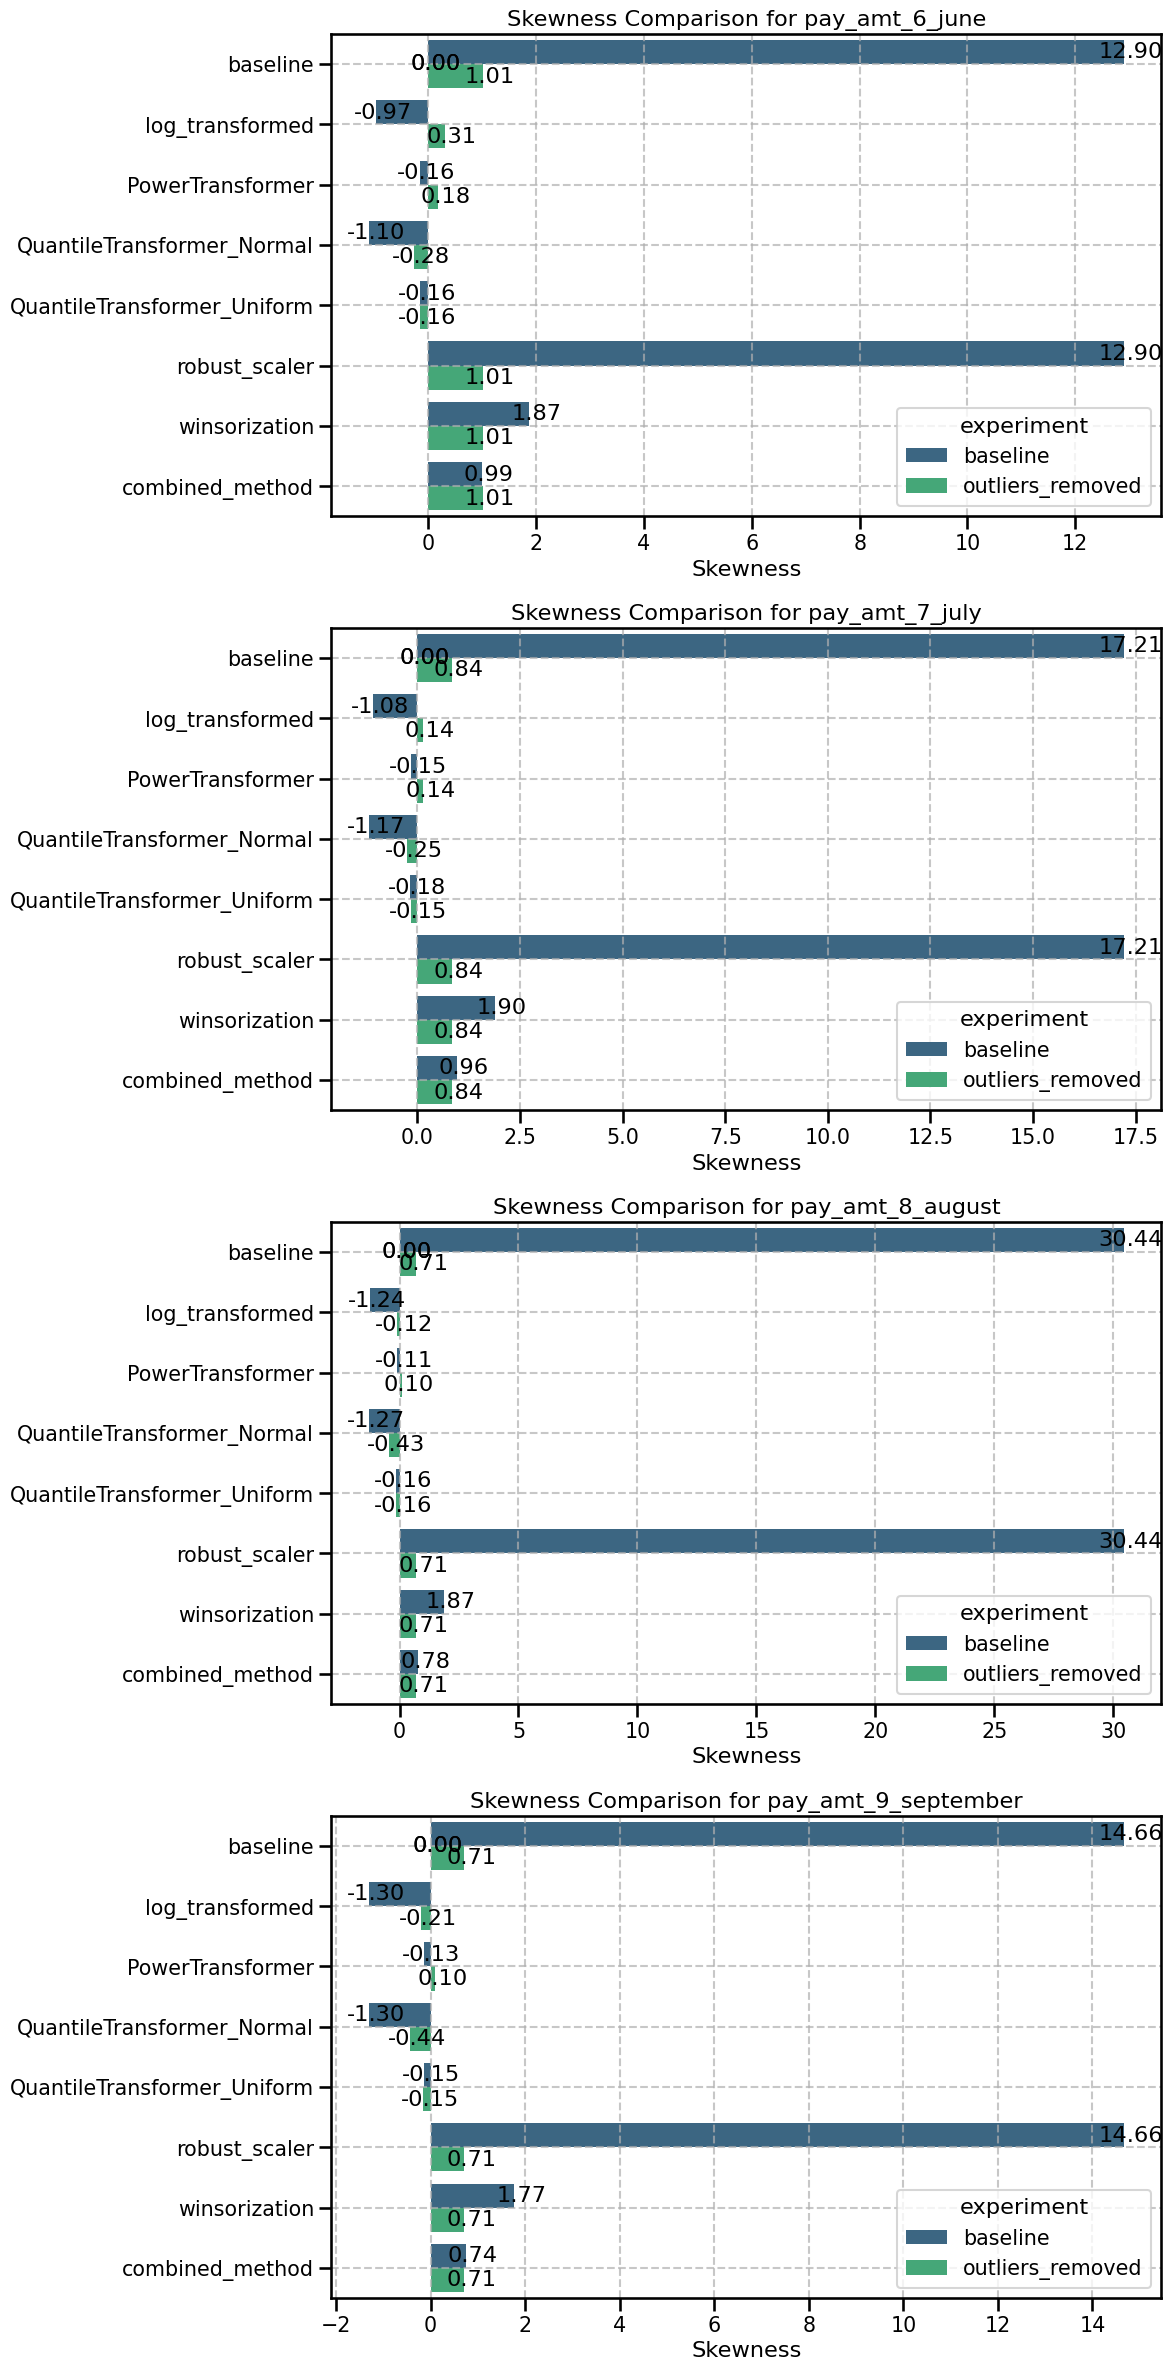

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_skewness_comparison(skewness_df, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(12, 24))
    axes = axes.flatten()
    sns.set_context('talk', font_scale=0.9)

    for i, col in enumerate(columns):
        sns.barplot(y='transformation_method', x=col, hue='experiment', palette='viridis', data=skewness_df, ax=axes[i])
        axes[i].set_title(f'Skewness Comparison for {col}')
        axes[i].set_ylabel('')
        axes[i].set_xlabel('Skewness')
        axes[i].grid(True, linestyle='--', alpha=0.7)

        # Annotate the bars with skewness values
        for p in axes[i].patches:
            width = p.get_width()
            axes[i].annotate(f'{width:.2f}',
                             (width, p.get_y() + p.get_height() / 2),
                             ha='center', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Columns to plot skewness for
pay_columns = ['pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']

# Plot skewness comparison
plot_skewness_comparison(combined_skewness_df, pay_columns)

### Skewness Analysis
Analyzing the skewness data before and after outlier removal provides insight into whether additional transformations are necessary.

### Key Observations:

1. **Baseline vs. Outliers Removed (No Transformation):**
   - In the baseline, the skewness values for all `pay_amt_*` columns are extremely high (e.g., `pay_amt_8_august` skewness is 30.44). This suggests a heavy skew in the distribution.
   - After outlier removal, the skewness values are significantly reduced (e.g., `pay_amt_8_august` skewness drops to 0.71), indicating that outlier removal alone improves the distribution.

2. **Log Transformed:**
   - Both the baseline and outlier-removed experiments show that log transformation brings the skewness close to 0 or negative (closer to symmetric distributions). This holds true even after outlier removal.
   - Notably, in the outlier-removed experiment, skewness becomes positive for some columns (e.g., `pay_amt_6_june` skewness is 0.31), whereas it was negative in the baseline.

3. **Power Transformer:**
   - The Power Transformer results in minimal skewness in both experiments, maintaining values close to 0. This indicates that the transformation is effective whether or not outliers are removed.
   - After outlier removal, the skewness remains low but is slightly positive compared to the baseline, which suggests that outliers did contribute slightly to the initial skew.

4. **Quantile Transformer (Normal and Uniform):**
   - The Quantile Transformer shows relatively consistent skewness across both experiments, maintaining values around -1 for the normal distribution and close to 0 for the uniform distribution.
   - Removing outliers doesn't seem to significantly impact the effectiveness of the Quantile Transformer.

5. **Robust Scaler and Winsorization:**
   - In both cases, the skewness remains high when applied without outlier removal, indicating that these transformations alone are not sufficient for addressing skewness.
   - After outlier removal, both transformations bring the skewness closer to 1, showing improved distributions, but they do not fully address the skew.

6. **Combined Method:**
   - The combined method (IQR + Winsorization + Robust Scaling) provides the best results among non-distribution transformations. It reduces skewness significantly in the baseline experiment.
   - After outlier removal, the combined method stabilizes skewness even further, keeping it around 0.7 across all columns.

### Should You Apply Both Outlier Removal and Distribution Transformation?
**Yes.** Here’s why:
- **Outlier Removal Alone Isn’t Enough:** While outlier removal improves skewness, it doesn’t bring all columns into an ideal range (close to 0).
- **Transformation Still Provides Value:** Even after outlier removal, transformations like log, Power, and Quantile Transformations further reduce skewness to near-zero levels.
- **Combined Approach Yields the Best Results:** Using outlier removal followed by a transformation like the Power Transformer or Quantile Transformer produces the most symmetric distributions.

### Conclusion:
- For your dataset, removing outliers improves the distribution, but applying transformations (e.g., Power Transformer or Quantile Transformer) further enhances the results. A combined approach is recommended to achieve the most optimal distribution and improve model performance.

## Load & Process Classification Reports

In [17]:
# File paths
classification_reports_baseline_path = '/content/classification_reports_baseline.json'
classification_reports_outliers_removed_path = '/content/classification_reports_oultiers_removed.json'

# Load the JSON files
with open(classification_reports_baseline_path, 'r') as file:
    classification_reports_baseline = json.load(file)

with open(classification_reports_outliers_removed_path, 'r') as file:
    classification_reports_outliers_removed = json.load(file)

# Function to convert classification report to DataFrame
def classification_report_to_df(report, model_name, experiment_name):
    report_df = pd.DataFrame(report).transpose().reset_index()
    report_df['model'] = model_name
    report_df['experiment'] = experiment_name
    # Filtering out 'accuracy', 'macro avg', and 'weighted avg' if you only want per-class metrics
    report_df = report_df[~report_df['index'].isin(['accuracy', 'macro avg', 'weighted avg'])]
    return report_df

# Convert each classification report in the dictionaries to DataFrames and combine them
classification_reports_dfs = []

# Add baseline reports
for model_name, report in classification_reports_baseline.items():
    classification_reports_dfs.append(classification_report_to_df(report, model_name, 'baseline'))

# Add outliers removed reports
for model_name, report in classification_reports_outliers_removed.items():
    classification_reports_dfs.append(classification_report_to_df(report, model_name, 'outliers_removed'))

# Combine all classification reports into one DataFrame
combined_classification_reports_df = pd.concat(classification_reports_dfs, axis=0).reset_index(drop=True)

# Display the combined DataFrame
combined_classification_reports_df


,index,precision,recall,f1-score,support,model,experiment
0,0,0.820332,0.973430,0.890348,4667.0,baseline,baseline
1,1,0.727473,0.249623,0.371701,1326.0,baseline,baseline
2,0,0.819621,0.964860,0.886330,4667.0,log_transformed,baseline
3,1,0.671343,0.252640,0.367123,1326.0,log_transformed,baseline
4,0,0.819404,0.966360,0.886835,4667.0,PowerTransformer,baseline
5,1,0.678937,0.250377,0.365840,1326.0,PowerTransformer,baseline
6,0,0.819803,0.965074,0.886527,4667.0,QuantileTransformer_Normal,baseline
7,1,0.673347,0.253394,0.368219,1326.0,QuantileTransformer_Normal,baseline
8,0,0.819666,0.968074,0.887710,4667.0,QuantileTransformer_Uniform,baseline
9,1,0.690229,0.250377,0.367460,1326.0,QuantileTransformer_Uniform,baseline


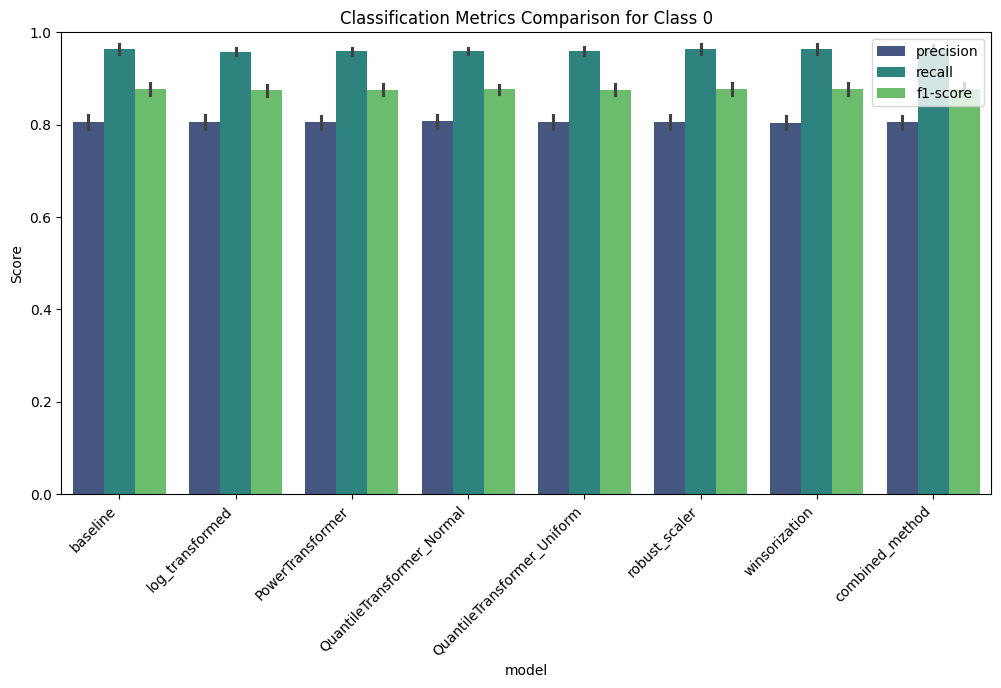

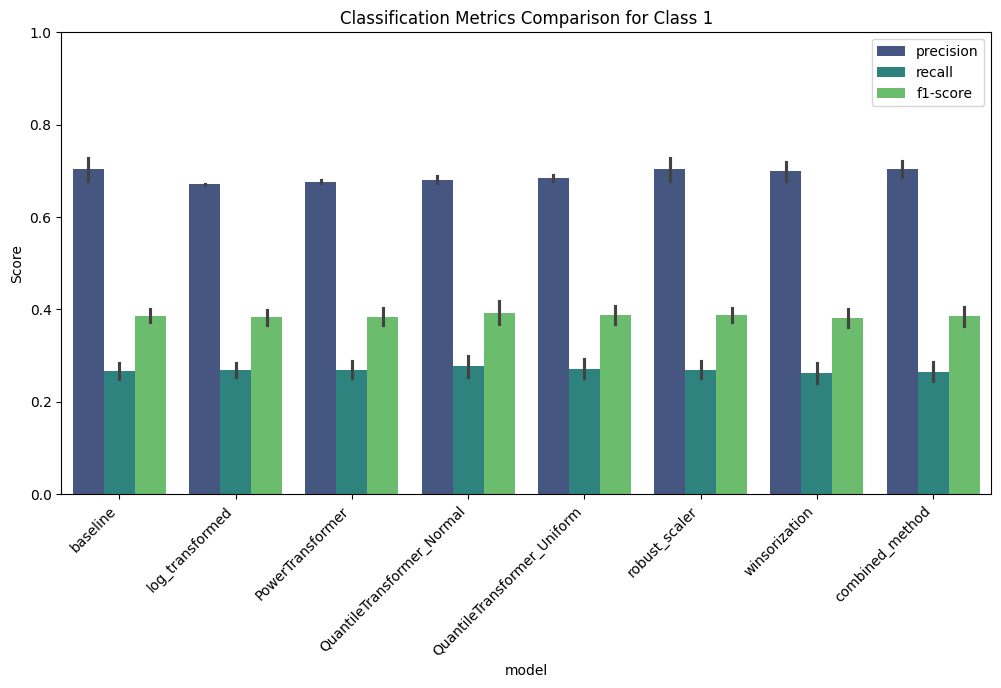

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_classification_metrics(df, class_label):
    metrics = ['precision', 'recall', 'f1-score']
    filtered_df = df[df['index'] == str(class_label)]

    plt.figure(figsize=(12, 6))
    sns.barplot(x='model', y='value', hue='variable', palette='viridis',
                data=pd.melt(filtered_df, id_vars=['experiment', 'model', 'index'], value_vars=metrics))
    plt.title(f'Classification Metrics Comparison for Class {class_label}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper right')
    plt.show()

# Plot metrics for both classes (0 and 1)
for class_label in [0, 1]:
    plot_classification_metrics(combined_classification_reports_df, class_label)



### Classification Report Analysis

The results you’ve presented indicate minimal improvement or even stagnation in model performance after applying distribution transformations. Here’s an analysis based on your classification metrics:

### 1. **Baseline Performance vs. Distribution Transformed Models:**
   - **Precision, Recall, F1-Score:** Across both the baseline and outliers removed experiments, there is no significant performance boost in precision, recall, or F1-score after applying different distribution transformations. The slight variations across metrics don’t suggest substantial changes in the model’s ability to differentiate between classes.
   - **Class 0 vs. Class 1:** The metrics for Class 0 (the majority class) are consistently strong, while those for Class 1 (the minority class) remain lower. This indicates that even after applying transformations, the model continues to struggle with correctly identifying minority class examples.

### 2. **Impact of Outlier Removal:**
   - **Outliers Removed vs. Baseline:** After outlier removal, there’s a slight improvement in Class 1 recall and F1-score, but the improvement is small. In some cases, like `log_transformed`, the metrics actually worsen slightly compared to the baseline.

### 3. **Consistency Across Transformation Methods:**
   - For each transformation method (e.g., `PowerTransformer`, `QuantileTransformer`, `winsorization`), the performance is nearly identical, suggesting that these transformations are not adding much value in terms of improving model prediction.

### 4. **Does It Make Sense to Apply Transformations After Outlier Removal?**
   - **No Significant Improvement:** Given that performance metrics remain largely unchanged after applying transformations, applying these transformations might be unnecessary.
   - **Skewness Adjustment:** While transformations do adjust the skewness of the distributions, this adjustment is not translating into better classification performance. If reducing skewness is not directly improving model metrics, then skipping this step after outlier removal might be justified.

### 5. **Recommendation:**
   - **Prioritize Simplicity:** Since the distribution transformations don’t seem to yield better results, it may be more efficient to focus on simpler preprocessing steps (like outlier removal) rather than complex transformations.
   - **Focus on Class 1 Improvement:** The key challenge remains improving recall and F1-score for Class 1. Consider alternative strategies like resampling methods (e.g., SMOTE) or adjusting decision thresholds rather than focusing on distribution transformations.
